# 요약

- 자료: 처음 시작하는 머신러닝 10장
- 환경: 
    - https://hub.docker.com/r/taewanme/pyml/
    - http://taewan.kim/post/python_env_for_machine_learning/
- 작성일: 2018.08.19

## 데이터 셋

- http://archive.ics.uci.edu/ml/datasets/Online+Retail

## 데이터 다운로드

In [61]:
!ls *.xslx

ls: '*.xslx'에 접근할 수 없습니다: 그런 파일이나 디렉터리가 없습니다


In [62]:
%%sh
file="./data.xlsx"
if [ -f "$file" ]
then
	echo "$file found."
else
    curl -o ./data.xlsx http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
	echo "$file is downloaded."
fi

./data.xlsx found.


## 목표

- StockCode와 CusteomerID로 군집화

## Description of Features

|Name of Feature|데이터 형|의미|Unique|특이 사항|
|----| ---- | ---- | ---- | ---- |
|InvoiceNo|6자리 정수형|주문번호|Y|c문자로 시작하는 주문 번호는 주문 취소됨을 의미|
|StockCode|5자리 정수형|제품번호|X||
|Description|문자형|설명|X||
|Quantity|수치형|수량||X||
|InvoiceDate|주문일자|문자형|X||
|UnitPrice|단위 가격|수치형|X|영국화폐 Sterling|
|CustomerID|5자리 정수형|고객번호|X||
|Country|String|국가명||X||





## 데이터 전처리

In [151]:
import pandas as pd

df=pd.read_excel("./data.xlsx")

In [152]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


- 고유 사용자 수와 구매 상품수를 사용하여 통계량을 조사
- 전체 사용자 수 및 상품수 확인
- 한 사용자가 구매한 고유 상품 수의 기초 통계량

In [153]:
df.to_csv("./temp.csv", header=False, index=False)

In [154]:
!head ./temp.csv

536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [155]:
import scipy
from scipy import stats
import time

In [156]:
user_product_dic={}
product_user_dic={}
product_id_name_dic={}

In [157]:
for line in open("./temp.csv"):
    line_items = line.strip().split(',')
    user_code = line_items[6]
    product_id = line_items[1]
    product_name = line_items[2]
    
    
    if len(user_code) == 0:
        continue
        
    country = line_items[7]
    if country != 'United Kingdom':
        continue
        
    try:
        invoice_year = time.strptime(line_items[4], '%Y-%m-%d %H:%M:%S').tm_year
    
    except ValueError:
        print(ValueError)
        continue
        
    if invoice_year != 2011:
        continue
        
    user_product_dic.setdefault(user_code, set())
    user_product_dic[user_code].add(product_id)
    
    product_user_dic.setdefault(product_id, set())
    product_user_dic[product_id].add(user_code)
    
    product_id_name_dic[product_id]=product_name
    
    
product_per_user_li = [len(x) for x in user_product_dic.values()]
            

In [158]:
"# of users", len(user_product_dic)

('# of users', 3834)

In [159]:
"# of products", len(product_user_dic)

('# of products', 3544)

In [160]:
stats.describe(product_per_user_li)

DescribeResult(nobs=3834, minmax=(1, 1590), mean=58.242566510172146, variance=6087.575896985531, skewness=5.818248895880259, kurtosis=72.40326298621056)

In [161]:
import matplotlib.pyplot as plt
from collections import Counter

In [162]:
plot_data_all = Counter(product_per_user_li)

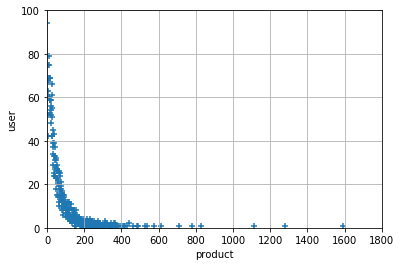

In [163]:
plot_data_x = list(plot_data_all.keys())
plot_data_y = list(plot_data_all.values())
plt.scatter(plot_data_x, plot_data_y, marker="+")
plt.grid()
plt.xlabel("product")
plt.ylabel("user")
plt.ylim(0, 100)
plt.xlim(0, 1800)
plt.show()

- 600개 이상을 구매하는 사용자는 거의 없음
    - 1개 구매자 노이즈로 간주
    - 600개 이상 구매자는 노이즈로 간주
    - 1개 혹은 600개 이상 구매자 제거

In [164]:
min_product_user_li = [k for k, v in user_product_dic.items() if len(v)==1]

In [165]:
len(min_product_user_li)

94

In [166]:
max_product_user_li = [k for k, v in user_product_dic.items() if len(v)>=600]

In [167]:
len(max_product_user_li)

7

In [168]:
"1개 상품 구입 고객", len(min_product_user_li)

('1개 상품 구입 고객', 94)

In [169]:
"600개 이상 상품 구입 고객", len(max_product_user_li)

('600개 이상 상품 구입 고객', 7)

In [170]:
user_product_dic = {k:v for k, v in user_product_dic.items() if len(v)>1 and len(v)<600}

In [171]:
"분석 대상 고객 수", len(user_product_dic)

('분석 대상 고객 수', 3733)

In [172]:
id_product_dic = {}
for product_set_li in user_product_dic.values():
    for x in product_set_li:
        if x in id_product_dic:
            product_id = id_product_dic[x]
        else:
            #product_id: index from 0
            id_product_dic.setdefault(x, len(id_product_dic))

            
"# of left items", len(id_product_dic)
        

('# of left items', 3524)

In [173]:
id_product_dic

{'20718': 0,
 '22458': 1,
 '22421': 2,
 '85123A': 3,
 '23199': 4,
 '22379': 5,
 '22751': 6,
 '21498': 7,
 '23203': 8,
 '22381': 9,
 '22382': 10,
 '22384': 11,
 '22419': 12,
 '84997C': 13,
 '20728': 14,
 '21519': 15,
 '23153': 16,
 '23202': 17,
 '23350': 18,
 '22667': 19,
 '22383': 20,
 '22386': 21,
 '20682': 22,
 '20727': 23,
 '22742': 24,
 '22420': 25,
 '21930': 26,
 '22862': 27,
 '84997D': 28,
 '22808': 29,
 '23206': 30,
 '21499': 31,
 '22961': 32,
 '21891': 33,
 '23301': 34,
 '22302': 35,
 '23256': 36,
 '22303': 37,
 '23222': 38,
 '23103': 39,
 '85099C': 40,
 '22809': 41,
 '85099B': 42,
 '22896': 43,
 '84755': 44,
 '23582': 45,
 '22898': 46,
 '22960': 47,
 '48138': 48,
 '21411': 49,
 '23504': 50,
 '23503': 51,
 '21231': 52,
 '23093': 53,
 '23177': 54,
 '22062': 55,
 '22555': 56,
 '23490': 57,
 '22986': 58,
 '48185': 59,
 '22418': 60,
 '22557': 61,
 '23111': 62,
 '21733': 63,
 '23284': 64,
 '22739': 65,
 '84077': 66,
 '70006': 67,
 '20829': 68,
 '22508': 69,
 '23234': 70,
 '23184': 7

## one-hot encoding

In [174]:
id_user_dic={}
user_product_vec_li=[]
all_product_count = len(id_product_dic)

In [175]:
for user_code, product_per_user_set in user_product_dic.items():
    user_product_vec = [0]*all_product_count
    ## len(id_user_dic)==> index 생성 코드
    id_user_dic[len(id_user_dic)] = user_code
    
    for product_name in product_per_user_set:
        user_product_vec[id_product_dic[product_name]]=1
        
    user_product_vec_li.append(user_product_vec)
        
    

In [176]:
" ".join(str(x) for x in user_product_vec_li[2])

'0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## K-Mean Clustering

```python
sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')
```

- n_cluster: 클러스터 수
- n_init: 클러스터 중심 초기화 횟수, 10이면 10회 반복 학습
- init: 
    - k-means++: 수렴을 빠르게 하기 위한 제안, 떨어진 중심점
    - random
    - ndarray
- tol: 조기 종료
    - 예전 중심점과 현재 중심점이 tol보다 작으면 종료
    - default: 0.00001
- max_iter: 중심점 최대 업데이트

- 참조 속성
    - cluster_centers_: 중심축
    - labels_
    - inertia_: 샘플과 소속 클러스터의 중심 거리

In [178]:
" ".join(str(x) for x in user_product_vec_li[1])

'0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [179]:
random.shuffle?

In [180]:
from sklearn.cluster import KMeans
import random

#shuffle
random.shuffle(user_product_vec_li)

# 학습용 데이터에 사용자 2500명을, 평가용 데이터에 나머지 사용자를 넣습니다.
# 학습용 데이터에 있는 사용자 정보만을 가지고 클러스터를 만든 후
# 평가용 데이터의 사용자가 어느 클러스터에 속하는지 알아봅니다.
train_data = user_product_vec_li[:2500]
test_data = user_product_vec_li[2500:]

print("# of train data:% d, # of test_data: %d" % (len(train_data),len(test_data)))
# 학습 데이터를 군집화하여 4개의 클러스터를 생성한 후 그 결과를 km_predict에 저장합니다.
km_predict = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=20).fit(train_data)

# km_predict 의 predict 함수를 이용하여 평가 데이터가 전 단계에서 만든 4개의 클러스터 중 어느 곳에
# 속하는지 살펴봅니다.
km_predict_result = km_predict.predict(test_data)
print(km_predict_result)


# of train data: 2500, # of test_data: 1233
[1 1 1 ... 1 3 1]


- 비지도학습
- id를 갖고 다닐 필요 없음

## K 값을 구하는 방법

### 실루엣 계수

In [185]:
from sklearn.metrics import silhouette_score
import numpy as np

test_data = np.array(user_product_vec_li)

for k in range (2, 9):
    km = KMeans(n_clusters=k).fit(test_data)
    print(k, silhouette_score(test_data, km.labels_))

2 0.3446207829790676
3 0.21619904936076575
4 0.21812172444201042
5 0.21608042459998641
6 0.2058213261887773
7 0.21610452499598454
8 0.1834749754471444


- 군집은 2가 적합
- 군집 성능은 떨어짐

### 엘보 계수

- 클러스터의 중심과 거리의의 합이 작은 것이 좋음

$$
SS_w = \sum_{x \in C}(x-\mu c)^2
$$

- $\mu c$: 클러스터의 센터

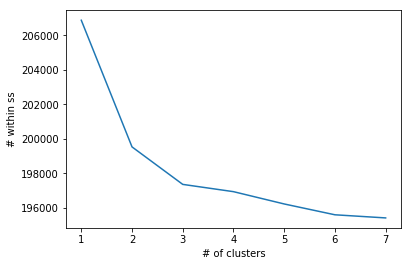

In [190]:
import matplotlib.pyplot as plt

ssw_dic={}

for k in range(1, 8):
    km = KMeans(n_clusters=k).fit(test_data)
    ssw_dic[k]=km.inertia_

plot_data_x = list(ssw_dic.keys())
plot_data_y = list(ssw_dic.values())
plt.xlabel ("# of clusters")
plt.ylabel("# within ss")
plt.plot(plot_data_x, plot_data_y)
plt.show()

- 기울기가 가장 큰곳은 : 1-2사이
- 클러스터 갯수는 2로 선정

## 정성적인 판단

- Keyword fequeny

In [195]:
def analyze_clusters_keywords(labels,product_id_name_dic,user_product_dic, id_user_dic):
    #각 클러스터의 아이디와, 해당 아이디의 클러스터 들어있는 유저 수를 출력합니다. 
    print(Counter(labels))
    cluster_item = {}

    for i in range(len(labels)):
        cluster_item.setdefault(labels[i], [])

        # 각 사용자의 임시 ID i에 대해 사용자 코드를 찾은 후
        # 그 사용자 코드와 연결된 구매상품의 ID를 참조한 후
        # 그 ID를 이용해 상품명을 찾아
        # 딕셔너리에 클러스터 ID를 키로, 상품명을 값으로 추가합니다.
        for x in user_product_dic[id_user_dic[i]]:
            cluster_item[labels[i]].extend([product_id_name_dic[x]])
    
    for cluster_id, product_name in cluster_item.items():
        
        # 각 클러스터안의 상품명을 join명령으로 합쳐 하나의 문자열로 만든 뒤
        # 스페이스 혹은 탭으로 스플릿하여 키워드로 분해합니다. 
        product_name_keyword = (" ").join(product_name).split()

        # 클러스터의 아이디와, 그 아이디를 가지는 클러스터에 속하는 유저들이 구매한 상품들의 상품명안에
        # 가장 자주 나타나는 단어 20개를 역순으로 출력합니다
        print("cluster_id:", cluster_id)
        print(Counter(product_name_keyword).most_common(20))
        
km=KMeans(n_clusters=2, n_init=10,max_iter=20)
km.fit(test_data)
analyze_clusters_keywords(km.labels_,product_id_name_dic,user_product_dic,id_user_dic)


Counter({1: 3204, 0: 529})
cluster_id: 1
[('OF', 19499), ('SET', 19324), ('HEART', 14523), ('BAG', 14098), ('VINTAGE', 13516), ('RED', 13065), ('CHRISTMAS', 10599), ('RETROSPOT', 10436), ('DESIGN', 9706), ('PINK', 8656), ('BOX', 7532), ('CAKE', 7457), ('METAL', 7245), ('3', 6761), ('BLUE', 6368), ('WHITE', 6338), ('HANGING', 6108), ('HOLDER', 5999), ('JUMBO', 5709), ('PACK', 5540)]
cluster_id: 0
[('OF', 3399), ('SET', 3329), ('VINTAGE', 2426), ('BAG', 2369), ('HEART', 2338), ('RED', 2255), ('CHRISTMAS', 1858), ('RETROSPOT', 1772), ('DESIGN', 1677), ('PINK', 1553), ('BOX', 1321), ('CAKE', 1229), ('METAL', 1183), ('3', 1148), ('BLUE', 1108), ('PACK', 1034), ('WHITE', 991), ('JUMBO', 943), ('SIGN', 916), ('PAPER', 893)]


- 

In [197]:
def analyze_clusters_keywords_bigram(labels,product_id_name_dic,user_product_dic, id_user_dic):
    #각 클러스터의 아이디와, 해당 아이디의 클러스터 들어있는 유저 수를 출력합니다. 
    print(Counter(labels))
    cluster_item = {}

    for i in range(len(labels)):
        cluster_item.setdefault(labels[i], [])

        # 각 사용자의 임시 ID i에 대해 사용자 코드를 찾은 후
        # 그 사용자 코드와 연결된 구매상품의 ID를 참조한 후
        # 그 ID를 이용해 상품명을 찾아
        # 딕셔너리에 클러스터 ID를 키로, 상품명을 값으로 추가합니다.
        for x in user_product_dic[id_user_dic[i]]:
            cluster_item[labels[i]].extend([product_id_name_dic[x]])

    for cluster_id, product_name in cluster_item.items():
        # 각 클러스터 안의 상품명을 join 명령으로 합쳐 하나의 문자열로 만든 뒤
        # OF를 공백으로 리플레이스하고
        # 스페이스 혹은 탭으로 스플릿하여 키워드로 분해한 뒤
        # 연속되는 두 키워드를 합쳐서 하나의 키워드를 만듭니다.
        bigram = []
        product_name_keyword = (' ').join(product_name).replace(' OF ', ' ').split()
        for i in range(0, len(product_name_keyword) - 1):
            bigram.append(' '.join(product_name_keyword[i:i + 2]))
        print('cluster_id:', cluster_id)
        print(Counter(bigram).most_common(20))
        
km=KMeans(n_clusters=2, n_init=10,max_iter=20)
km.fit(user_product_vec_li)
analyze_clusters_keywords_bigram(km.labels_,product_id_name_dic,user_product_dic,id_user_dic)


Counter({1: 3203, 0: 530})
cluster_id: 1
[('RED RETROSPOT', 5557), ('JUMBO BAG', 4641), ('METAL SIGN', 4158), ('T-LIGHT HOLDER', 4101), ('LUNCH BAG', 3989), ('HOT WATER', 3164), ('WATER BOTTLE', 3164), ('CAKE CASES', 3080), ('SET 3', 3010), ('VINTAGE CHRISTMAS', 2875), ('SET 6', 2444), ('DOLLY GIRL', 2198), ('BAG VINTAGE', 2125), ('HANGING HEART', 1963), ("50'S CHRISTMAS", 1937), ('VINTAGE DOILY', 1904), ('PACK 12', 1851), ('SET 4', 1851), ('HOME SWEET', 1747), ('SWEET HOME', 1747)]
cluster_id: 0
[('RED RETROSPOT', 933), ('JUMBO BAG', 773), ('METAL SIGN', 676), ('LUNCH BAG', 673), ('HOT WATER', 565), ('WATER BOTTLE', 565), ('T-LIGHT HOLDER', 545), ('VINTAGE CHRISTMAS', 544), ('SET 3', 527), ('CAKE CASES', 523), ('SET 6', 418), ('DOLLY GIRL', 395), ('PACK 12', 385), ("50'S CHRISTMAS", 357), ('BAG VINTAGE', 357), ('VINTAGE DOILY', 341), ('PINK POLKADOT', 296), ('SET 4', 293), ('HOME SWEET', 291), ('SWEET HOME', 290)]


- Cluster 통계량

In [200]:
def analyze_clusters_product_count(label, user_product_dic, id_user_dic):
    product_len_dic = {}
    for i in range(0, len(label)):
        product_len_dic.setdefault(label[i], [])
        # 클러스터의 ID를 키로 하는 딕셔너리에
        # 그 클러스터에 속한 사용자가 구매한 고유 상품의 가짓수를 저장합니다.
        product_len_dic[label[i]].append(len(user_product_dic[id_user_dic[i]]))
    for k, v in product_len_dic.items():
        print('cluster:', k)
        print(stats.describe(v))
        
analyze_clusters_product_count(km.labels_, user_product_dic,id_user_dic)


cluster: 1
DescribeResult(nobs=3203, minmax=(2, 573), mean=57.74555104589447, variance=4360.7856415060605, skewness=2.6004316330391606, kurtosis=9.185351121944434)
cluster: 0
DescribeResult(nobs=530, minmax=(2, 485), mean=59.12641509433962, variance=4285.683421906765, skewness=2.4233752089627516, kurtosis=7.7096663968946135)


## 계층적인 클러스터

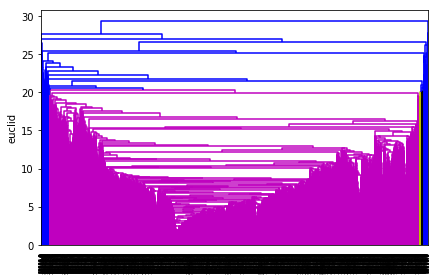

In [201]:

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# scipy의 집괴적 군집화 함수
# 이번에는 두 클러스터에 속한 모든 샘플 간의 거리 평균을
# 클러스터를 집괴하는 기준으로 합니다.
# 거리 함수로는 유클리드 함수를 씁니다.

row_clusters = linkage(test_data, method='complete',metric='euclidean')
# 사용자 ID를 사용자 코드로 변환합니다.
tmp_label=[]
for i in range(len(id_user_dic)):
    tmp_label.append(id_user_dic[i])
    
# 플롯을 그립니다.
row_denr = dendrogram(row_clusters,labels=tmp_label)
plt.tight_layout()
plt.ylabel('euclid')
plt.show()


In [202]:
from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='ward')
ward.fit(test_data)

analyze_clusters_keywords_bigram(ward.labels_,product_id_name_dic,user_product_dic,id_user_dic)


Counter({1: 2961, 0: 772})
cluster_id: 1
[('RED RETROSPOT', 5189), ('JUMBO BAG', 4212), ('METAL SIGN', 3862), ('T-LIGHT HOLDER', 3767), ('LUNCH BAG', 3704), ('HOT WATER', 2945), ('WATER BOTTLE', 2945), ('CAKE CASES', 2878), ('SET 3', 2800), ('VINTAGE CHRISTMAS', 2683), ('SET 6', 2278), ('DOLLY GIRL', 1980), ('BAG VINTAGE', 1953), ("50'S CHRISTMAS", 1810), ('HANGING HEART', 1807), ('VINTAGE DOILY', 1766), ('PACK 12', 1756), ('SET 4', 1717), ('HOME SWEET', 1620), ('SWEET HOME', 1620)]
cluster_id: 0
[('RED RETROSPOT', 1301), ('JUMBO BAG', 1202), ('METAL SIGN', 972), ('LUNCH BAG', 958), ('T-LIGHT HOLDER', 879), ('HOT WATER', 784), ('WATER BOTTLE', 784), ('SET 3', 738), ('VINTAGE CHRISTMAS', 736), ('CAKE CASES', 725), ('DOLLY GIRL', 613), ('SET 6', 584), ('BAG VINTAGE', 530), ("50'S CHRISTMAS", 484), ('PACK 12', 480), ('VINTAGE DOILY', 479), ('SET 4', 428), ('UNION JACK', 424), ('HOME SWEET', 418), ('SWEET HOME', 417)]
